In [25]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pandas as pd

In [26]:
import numpy as np

In [27]:
ff.read('close')
#ff.read('000001.SZ','ARRP')
#ff.cl

20100104  20100105  20100106  20100107  20100108  20100111  \
000001.SZ     23.71     23.30     22.90     22.65     22.60     22.60   
000002.SZ     10.60     10.36     10.36     10.28     10.35     10.18   
000004.SZ       NaN       NaN       NaN       NaN       NaN       NaN   
000005.SZ      5.99      6.20      6.08      5.83      5.89      5.82   
000006.SZ     11.12     10.80     10.83     10.74     11.00     10.71   
...             ...       ...       ...       ...       ...       ...   
873693.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873703.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873726.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873806.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873833.BJ       NaN       NaN       NaN       NaN       NaN       NaN   

           20100112  20100113  20100114  20100115  ...  20240111  20240112  \
000001.SZ     22.45     20.96     20.97     21.43  ...      9.17      9.19   
000002.SZ     10.29     10.04     10.03     10.14  ...      9.76      9.70   
000004.SZ       NaN       NaN       NaN       NaN  ...     16.86     16.03   
000005.SZ      6.13      6.04      6.07      6.09  ...      1.06      1.05   
000006.SZ     11.18     10.82     10.88     11.09  ...      4.52      4.46   
...             ...       ...       ...       ...  ...       ...       ...   
873693.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873703.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873726.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873806.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873833.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   

           20240115  20240116  20240117  20240118  20240119  20240122  \
000001.SZ      9.21      9.34      9.23      9.20      9.17      9.10   
000002.SZ      9.71      9.61      9.34      9.40      9.41      9.05   
000004.SZ     15.75     15.24     15.00     14.71     14.77     13.51   
000005.SZ      1.10      1.07      1.05      1.05      1.05      1.00   
000006.SZ      4.51      4.45      4.45      4.33      4.40      4.18   
...             ...       ...       ...       ...       ...       ...   
873693.BJ       NaN       NaN       NaN     32.67     33.56     31.34   
873703.BJ       NaN       NaN       NaN     38.41     39.90     37.90   
873726.BJ       NaN       NaN       NaN     37.99     38.70     37.32   
873806.BJ       NaN       NaN       NaN     11.02     10.70      9.72   
873833.BJ       NaN       NaN       NaN     12.93     13.30     12.55   

           20240123  20240124  
000001.SZ      9.16      9.33  
000002.SZ      9.18      9.41  
000004.SZ     13.45     13.59  
000005.SZ      1.05      1.04  
000006.SZ      4.23      4.48  
...             ...       ...  
873693.BJ     31.55     33.89  
873703.BJ     37.86     36.79  
873726.BJ     37.00     35.47  
873806.BJ     10.20     10.39  
873833.BJ     12.58     12.28  

[5516 rows x 3418 columns]

In [28]:
import sys
sys.path.append('/home/wangs/rs/lwm/lib')
import et
et.factor_lss

['closer',
 'lowr',
 'highr',
 'ocret',
 'lcret',
 'hcret',
 'ohret',
 'ret5',
 'ret10',
 'ret20',
 'ret30',
 'excess5',
 'excess10',
 'excess20',
 'excess30',
 'ma5',
 'bias5',
 'ma10',
 'bias10',
 'ma15',
 'bias15',
 'ma20',
 'bias20',
 'vwap_ret',
 'vwaph_ret',
 'a0',
 'a5',
 'a15',
 'a30',
 'ah5',
 'ah10',
 'ah15',
 'std',
 'amt_std',
 'vol_std',
 'amt_mean',
 'vol_mean',
 'turnover',
 'turnover_mean',
 'turnover_std',
 'turnover_skew',
 'turnoverf',
 'turnoverf_mean',
 'turnoverf_std',
 'turnoverf_skew',
 'mkv',
 'l_mkv',
 'lhret',
 'STR',
 'MTR',
 'SMTR',
 'ILLIQ']

In [29]:
close_price=ff.read('close')*ff.filter0

In [30]:
# 特质波动率;
# 过滤新股
# 使用tushare数据接口
import tushare as ts

pro = ts.pro_api('5b6a2c5b17b9572fe089a0802765f8b6434e72c51572718b1d37c302')

In [31]:
start_date="20210104"
end_date="20221230"
# 股票数据选择,end_date=end_date
data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,list_date,delist_date,name')
# 剔除不满六个月,以及非ST,*ST
df_ts_code=data[data["list_date"].apply(int).values<20040630]
df_ts_code=df_ts_code[-df_ts_code["name"].apply(lambda x:x.startswith("*ST") or x.startswith("ST"))]   
df_ts_code=df_ts_code["ts_code"].tolist()

In [32]:
ff.read('close')

20100104  20100105  20100106  20100107  20100108  20100111  \
000001.SZ     23.71     23.30     22.90     22.65     22.60     22.60   
000002.SZ     10.60     10.36     10.36     10.28     10.35     10.18   
000004.SZ       NaN       NaN       NaN       NaN       NaN       NaN   
000005.SZ      5.99      6.20      6.08      5.83      5.89      5.82   
000006.SZ     11.12     10.80     10.83     10.74     11.00     10.71   
...             ...       ...       ...       ...       ...       ...   
873693.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873703.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873726.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873806.BJ       NaN       NaN       NaN       NaN       NaN       NaN   
873833.BJ       NaN       NaN       NaN       NaN       NaN       NaN   

           20100112  20100113  20100114  20100115  ...  20240111  20240112  \
000001.SZ     22.45     20.96     20.97     21.43  ...      9.17      9.19   
000002.SZ     10.29     10.04     10.03     10.14  ...      9.76      9.70   
000004.SZ       NaN       NaN       NaN       NaN  ...     16.86     16.03   
000005.SZ      6.13      6.04      6.07      6.09  ...      1.06      1.05   
000006.SZ     11.18     10.82     10.88     11.09  ...      4.52      4.46   
...             ...       ...       ...       ...  ...       ...       ...   
873693.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873703.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873726.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873806.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   
873833.BJ       NaN       NaN       NaN       NaN  ...       NaN       NaN   

           20240115  20240116  20240117  20240118  20240119  20240122  \
000001.SZ      9.21      9.34      9.23      9.20      9.17      9.10   
000002.SZ      9.71      9.61      9.34      9.40      9.41      9.05   
000004.SZ     15.75     15.24     15.00     14.71     14.77     13.51   
000005.SZ      1.10      1.07      1.05      1.05      1.05      1.00   
000006.SZ      4.51      4.45      4.45      4.33      4.40      4.18   
...             ...       ...       ...       ...       ...       ...   
873693.BJ       NaN       NaN       NaN     32.67     33.56     31.34   
873703.BJ       NaN       NaN       NaN     38.41     39.90     37.90   
873726.BJ       NaN       NaN       NaN     37.99     38.70     37.32   
873806.BJ       NaN       NaN       NaN     11.02     10.70      9.72   
873833.BJ       NaN       NaN       NaN     12.93     13.30     12.55   

           20240123  20240124  
000001.SZ      9.16      9.33  
000002.SZ      9.18      9.41  
000004.SZ     13.45     13.59  
000005.SZ      1.05      1.04  
000006.SZ      4.23      4.48  
...             ...       ...  
873693.BJ     31.55     33.89  
873703.BJ     37.86     36.79  
873726.BJ     37.00     35.47  
873806.BJ     10.20     10.39  
873833.BJ     12.58     12.28  

[5516 rows x 3418 columns]

In [190]:
close = ff.read('close') 
post=ff.read('post') 
ret = (close*post).pct_change(1, axis=1)
MKT=(ret*ff.filter0).mean()
mv=ff.read('total_mv')*ff.filter0
pb=ff.read('pb')*ff.filter0
# SL
sl_mv_1=(mv<=mv.quantile(0.5)).replace({True:1,False:np.NaN})
sl_mv_2=(pb<=pb.quantile(0.3)).replace({True:1,False:np.NaN})
SL=((sl_mv_1*sl_mv_2).shift(1,axis=1)*ret).mean()
# SM
sm_mv_1=(mv<=mv.quantile(0.5)).replace({True:1,False:np.NaN})
sm_mv_2=((pb>pb.quantile(0.3))&(pb<=pb.quantile(0.7))).replace({True:1,False:np.NaN})
SM=((sm_mv_1*sm_mv_2).shift(1,axis=1)*ret).mean()
# SH
sh_mv_1=(mv<=mv.quantile(0.5)).replace({True:1,False:np.NaN})
sh_mv_2=(pb>pb.quantile(0.7)).replace({True:1,False:np.NaN})
SH=((sh_mv_1*sh_mv_2).shift(1,axis=1)*ret).mean()
# BL
bl_mv_1=(mv>mv.quantile(0.5)).replace({True:1,False:np.NaN})
bl_mv_2=(pb<=pb.quantile(0.3)).replace({True:1,False:np.NaN})
BL=((bl_mv_1*bl_mv_2).shift(1,axis=1)*ret).mean()
# BM
bm_mv_1=(mv>mv.quantile(0.5)).replace({True:1,False:np.NaN})
bm_mv_2=((pb>pb.quantile(0.3))&(pb<=pb.quantile(0.7))).replace({True:1,False:np.NaN})
BM=((bm_mv_1*bm_mv_2).shift(1,axis=1)*ret).mean()
# BH
bh_mv_1=(mv>mv.quantile(0.5)).replace({True:1,False:np.NaN})
bh_mv_2=(pb>pb.quantile(0.7)).replace({True:1,False:np.NaN})
BH=((bh_mv_1*bh_mv_2).shift(1,axis=1)*ret).mean()

In [191]:
SMB=(SM+SH+SL)/3-(BM+BL+BH)/3
HML=-((SH+BH)/2-(SL+BL)/2)

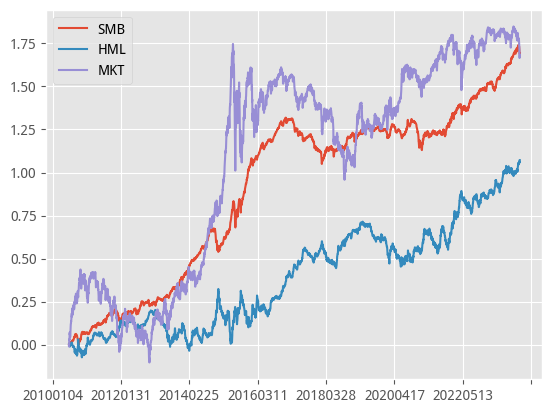

In [192]:
SMB.cumsum().plot()
HML.cumsum().plot()
MKT.cumsum().plot().legend(['SMB','HML','MKT'])

In [193]:
X=pd.concat([HML,SMB,MKT],axis=1)
X.columns=['HML','SMB','MKT']
X=X.dropna(how='all')

In [194]:
X

HML       SMB       MKT
20100702       NaN       NaN -0.004101
20100705  0.002842  0.001939 -0.006716
20100706 -0.003743  0.002894  0.028963
20100707 -0.005175  0.002131  0.013222
20100708  0.001522  0.000797 -0.003873
...            ...       ...       ...
20240118 -0.010247 -0.010290 -0.006905
20240119  0.005583 -0.003842 -0.012910
20240122  0.002063 -0.011384 -0.057804
20240123 -0.002951 -0.019738  0.002692
20240124  0.012320  0.002976  0.015157

[3299 rows x 3 columns]

In [199]:
n_date=ret.columns.tolist().index('20240124')
start_date=ret.columns.tolist()[n_date-20]

In [208]:
code='000001.SZ'
date='20210713'
X=pd.concat([SMB,HML,MKT],axis=1)
X.columns=['SMB','HML','MKT']
n_date=ret.columns.tolist().index(date)    
start_date=ret.columns.tolist()[n_date-19]
X_date=X.iloc[(n_date-20):n_date,:]
pct_chg_date=pct_chg.iloc[(n_date-20):n_date,:]
data=pd.concat([X_date,pct_chg_date],axis=1)   
data_code=data.loc[:,[code,'SMB','HML','MKT']].dropna()
#model=sm.OLS(data_code[code],data_code[['SMB','HML','MKT']]).fit()

In [202]:
ret.index

Index(['000001.SZ', '000002.SZ', '000004.SZ', '000005.SZ', '000006.SZ',
       '000007.SZ', '000008.SZ', '000009.SZ', '000010.SZ', '000011.SZ',
       ...
       '873576.BJ', '873593.BJ', '873665.BJ', '873679.BJ', '873690.BJ',
       '873693.BJ', '873703.BJ', '873726.BJ', '873806.BJ', '873833.BJ'],
      dtype='object', length=5516)

In [ ]:
close = ff.read('close') 
post=ff.read('post') 
ret = (close*post).pct_change(1, axis=1)
pct_chg=ret.T

In [230]:
import statsmodels.api as sm
X=pd.concat([SMB,HML,MKT],axis=1)
X.columns=['SMB','HML','MKT']
def get_IVol_ad(date):
    n_date=ret.columns.tolist().index(date)    
    X_date=X.iloc[(n_date-20):n_date,:]
    pct_chg_date=pct_chg.iloc[(n_date-20):n_date,:]
    data=pd.concat([X_date,pct_chg_date],axis=1)                               
    result_1={}
    result_2={}
    for code in ret.index:
        try:
            data_code=data.loc[:,[code,'SMB','HML','MKT']].dropna()
            if data_code.empty:
                continue
            else:
                X_ne=data_code[['SMB','HML','MKT']]
                X_ne=sm.add_constant(X_ne)
                model=sm.OLS(data_code[code],X_ne).fit()
                result_1[code]=model.resid.std()
                result_2[code]=1-model.rsquared
        except:
            return data_code
    result_1['date']=date
    result_2['date']=date
    return result_1,result_2

In [229]:
get_IVol_ad('20210713')

({'000001.SZ': 0.019865712152604333,
  '000002.SZ': 0.014368712379013758,
  '000004.SZ': 0.041042763292938274,
  '000005.SZ': 0.02138332236204277,
  '000006.SZ': 0.006369436431944189,
  '000007.SZ': 0.021592381456415042,
  '000008.SZ': 0.006650366466498701,
  '000009.SZ': 0.04160640788819725,
  '000010.SZ': 0.010385620156922876,
  '000011.SZ': 0.010552343746123762,
  '000012.SZ': 0.034182636833191275,
  '000014.SZ': 0.007710742268929485,
  '000016.SZ': 0.018849757765459614,
  '000017.SZ': 0.044133195414356216,
  '000018.SZ': 0.0,
  '000019.SZ': 0.0139967879596662,
  '000020.SZ': 0.014779857339553601,
  '000021.SZ': 0.01946037859253577,
  '000023.SZ': 0.01544006271598461,
  '000024.SZ': 0.0,
  '000025.SZ': 0.00857761144889971,
  '000026.SZ': 0.015585860266941854,
  '000027.SZ': 0.021434048648836072,
  '000028.SZ': 0.007410240991508211,
  '000029.SZ': 0.012625381774182907,
  '000030.SZ': 0.015737223585515738,
  '000031.SZ': 0.010026157120686613,
  '000032.SZ': 0.018296342161735223,
  '00

In [231]:
from multiprocessing import Pool
from tqdm import tqdm
#tqdm加在可迭代对象外，可以查看运行进程
dates=ret.loc[:,'20210713':'20230414'].columns
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(get_IVol_ad, dates), total=len(dates)))
    #注意：imap只能传入一个参数，如果有多个参数需要传入的话可以用元组作为参数，在函数中再对元组进行拆包
# 解包 res_lst 中的值到 res_lst1 和 res_lst2
res_lst1 = zip(*res_lst)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 427/427 [03:32<00:00,  2.01it/s]


In [232]:
res_lst1, res_lst2 = zip(*res_lst)

In [233]:
df_IVol=pd.DataFrame(data=res_lst1)
df_IVol.index=df_IVol['date']
df_IVol=df_IVol.drop('date',axis=1)
df_IVol=df_IVol.dropna(how='all')
df_IVol=df_IVol.T

In [234]:
df_IVR=pd.DataFrame(data=res_lst2)
df_IVR.index=df_IVR['date']
df_IVR=df_IVR.drop('date',axis=1)
df_IVR=df_IVR.dropna(how='all')
df_IVR=df_IVR.T

In [240]:
df_IVR['20210818']

000001.SZ    0.376150
000002.SZ    0.388406
000004.SZ    0.652052
000005.SZ    0.857966
000006.SZ    0.456675
               ...   
601061.SH         NaN
601065.SH         NaN
601133.SH         NaN
603125.SH         NaN
603135.SH         NaN
Name: 20210818, Length: 5088, dtype: float64

In [236]:
import matplotlib as mpl
mpl.rc("font", family='Droid Sans Fallback', weight="bold")

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


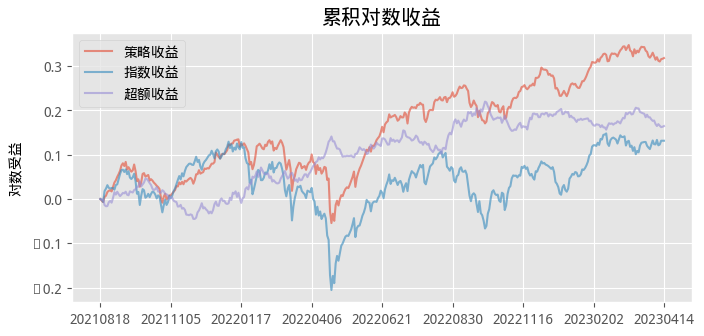

指数收益   超额收益   策略收益
年化收益率  0.082  0.103  0.198
年化波动率  0.212  0.103  0.167
夏普率    0.388  0.994  1.188
最大回撤  -0.335 -0.091 -0.189
收益回撤比  0.245  1.127  1.049
胜率     0.554  0.499  0.589
盈亏比    0.857  1.172  0.859

In [237]:
h = ff.run(df_IVol*ff.filter0.loc[:,'20210818':'20230414'], positions = 100, period = 1, fees = 0) 

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


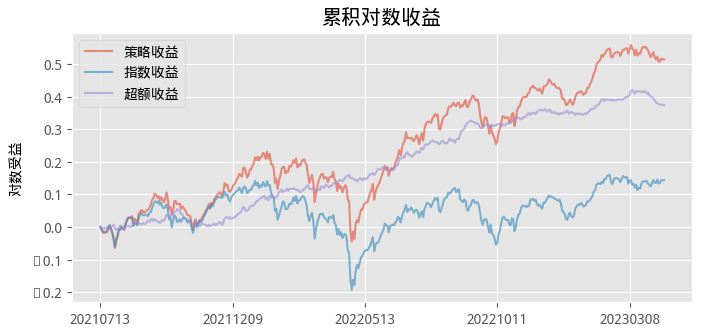

指数收益   超额收益   策略收益
年化收益率  0.084  0.219  0.301
年化波动率  0.210  0.079  0.232
夏普率    0.399  2.782  1.296
最大回撤  -0.335 -0.054 -0.275
收益回撤比  0.251  4.068  1.093
胜率     0.550  0.571  0.585
盈亏比    0.870  1.161  0.877

In [238]:
h = ff.run(df_IVR*ff.filter0, positions = 100, period = 1, fees = 0) 

In [ ]:
# 价格时滞
X=pd.concat([MKT,MKT.shift(1),MKT.shift(2),MKT.shift(3)],axis=1)
X.columns=['MKT','MKT1','MKT2','MKT3']
def get_PD(date):
    n_date=ret.columns.tolist().index(date)    
    start_date=ret.columns.tolist()[n_date-20]
    X_date=X.loc[start_date:date,:]
    pct_chg_date=pct_chg.loc[start_date:date,:]
    data=pd.concat([X_date,pct_chg_date],axis=1)                               
    result={}
    for code in ret.index:
        try:
            data_code=data.loc[:,[code,'MKT','MKT1','MKT2','MKT3']].dropna()
            if data_code.empty:
                continue
            else:
                model_1=sm.OLS(data_code[code],data_code[['MKT','MKT1','MKT2','MKT3']]).fit()
                model_2=sm.OLS(data_code[code],data_code['MKT']).fit()
                result[code]=1-model_2.rsquared/model_1.rsquared
        except:
            return data_code
    result['date']=date
    return result

In [ ]:
data_code=get_PD('20210714')

In [ ]:
dates=ret.loc[:,'20210713':'20230414'].columns
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(get_PD, dates), total=len(dates)))
    #注意：imap只能传入一个参数，如果有多个参数需要传入的话可以用元组作为参数，在函数中再对元组进行拆包

In [ ]:
df_PD=pd.DataFrame(data=res_lst)
df_PD.index=df_PD['date']
df_PD=df_PD.drop('date',axis=1)
df_PD=df_PD.dropna(how='all')
df_PD=df_PD.T

In [ ]:
h = ff.run(df_PD*ff.filter0, positions = 100, period = 1, fees = 0) 

In [ ]:
data_code

In [ ]:
# 换手率
turnover_rate=ff.read("turnover_rate")

In [ ]:
# 绘制密度分布直方图
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import laplace
mpl.rc("font",family='Droid Sans Fallback',weight='bold')

sns.set_palette("hls")
#sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
g = sns.distplot(data,
                 hist=True,
                 kde=True,  # 开启核密度曲线kernel density estimate (KDE)
                 kde_kws={'linestyle': '--', 'linewidth': '1', 'color': '#c72e29',
                          # 设置外框线属性
                          },
                 color='#098154',
                 axlabel='Standardized Residual',  # 设置x轴标题
                 )

plt.show()

In [ ]:
# 等权分组
data.sort
for i in range(10)

In [ ]:
pct_chg=ff.read('pct_chg')
pct_chg['20210104']